In [1]:
import os, sys

ruta_raiz = os.path.abspath("..")
if ruta_raiz not in sys.path:
    sys.path.append(ruta_raiz)

In [2]:
import numpy as np
import random
import torch
import torch.nn as nn
from collections import deque
from mpe2 import simple_tag_v3
import supersuit as ss
from NGUMultiAgent.NGUMulti import NGUMultiAgent
from NGU.DQN import DQN as NGU_DQN

In [3]:
seed = 42
env = simple_tag_v3.parallel_env(render_mode='rgb_array', num_good=1, num_adversaries=1, num_obstacles=0, max_cycles=100, dynamic_rescaling = True)
env.reset(seed=seed)
agents = env.agents

base_params = dict(
    learning_rate = 0.001,
    buffer_size = 5000,
    learning_starts = 500,
    batch_size = 128,
    tau = 1.0,
    gamma = 0.99,
    train_freq = 1,
    gradient_steps = 1,
    target_update_interval = 500,
    exploration_fraction = 0.1,
    exploration_initial_eps = 1,
    exploration_final_eps = 0.1,
    max_grad_norm = 10,
    verbose = 0,
    beta = 0.3
)

# Env fake para poder utilizar la clase NGU_DQN directamente
class FakeEnv:
    def __init__(self, observation_space, action_space):
        self.observation_space = observation_space
        self.action_space = action_space

agent_dict = {
    agent: NGU_DQN(FakeEnv(env.observation_space(agent), env.action_space(agent)), **base_params)
    for agent in agents if agent.startswith("adversary")
}


In [4]:
trainer = NGUMultiAgent(env, agent_dict, total_timesteps=100_000, log_interval=100)

In [5]:
trainer.learn()

----------------------------------
| time/               |          |
|    episodes         | 100
|    fps              | 170
|    time_elapsed     | 58
|    total_timesteps  | 10000
|    ep_len_mean      | 100
| adversary_0 -> mean_ep_rew | 4.70 | loss: 0.4894 | eps: 0.910
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 200
|    fps              | 166
|    time_elapsed     | 119
|    total_timesteps  | 20000
|    ep_len_mean      | 100
| adversary_0 -> mean_ep_rew | 7.10 | loss: 0.6446 | eps: 0.820
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 300
|    fps              | 162
|    time_elapsed     | 184
|    total_timesteps  | 30000
|    ep_len_mean      | 100
| adversary_0 -> mean_ep_rew | 6.10 | loss: 0.0690 | eps: 0.730
----------------------------------
----------------------------------
| time/               |          

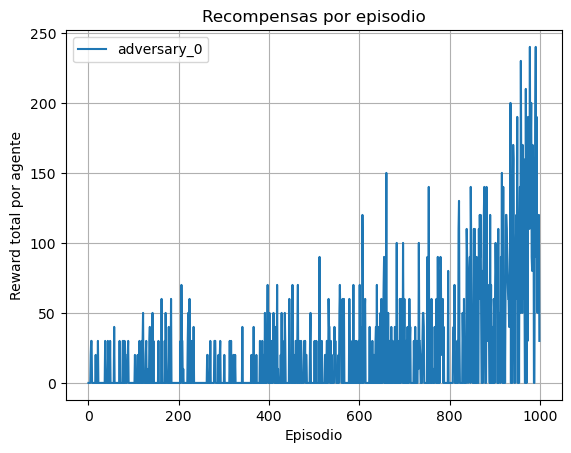

In [6]:
trainer.plot_total_rewards()

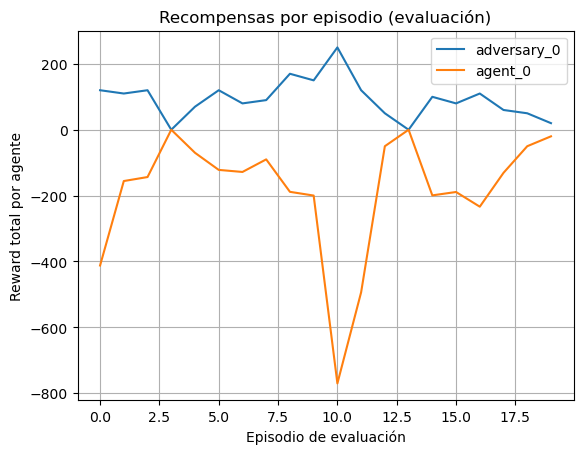

[{'adversary_0': 120.0, 'agent_0': -412.2487717305449},
 {'adversary_0': 110.0, 'agent_0': -155.77351742928684},
 {'adversary_0': 120.0, 'agent_0': -143.6350093369272},
 {'adversary_0': 0.0, 'agent_0': 0.0},
 {'adversary_0': 70.0, 'agent_0': -70.0},
 {'adversary_0': 120.0, 'agent_0': -121.92834373381503},
 {'adversary_0': 80.0, 'agent_0': -128.19338544690092},
 {'adversary_0': 90.0, 'agent_0': -90.0},
 {'adversary_0': 170.0, 'agent_0': -188.54140693723315},
 {'adversary_0': 150.0, 'agent_0': -199.87068728658488},
 {'adversary_0': 250.0, 'agent_0': -770.3680937463258},
 {'adversary_0': 120.0, 'agent_0': -493.6213498844762},
 {'adversary_0': 50.0, 'agent_0': -50.0},
 {'adversary_0': 0.0, 'agent_0': 0.0},
 {'adversary_0': 100.0, 'agent_0': -199.30266425894987},
 {'adversary_0': 80.0, 'agent_0': -189.02943381024323},
 {'adversary_0': 110.0, 'agent_0': -233.65564882319242},
 {'adversary_0': 60.0, 'agent_0': -130.8177118342506},
 {'adversary_0': 50.0, 'agent_0': -50.0},
 {'adversary_0': 20.0

In [7]:
trainer.evaluate(episodes=20)

In [8]:
trainer.render_and_save(num_tests=5, save_path="demo.mp4", fps=5, max_steps=50)

Video guardado en: demo.mp4


# 2 agentes

----------------------------------
| time/               |          |
|    episodes         | 100
|    fps              | 278
|    time_elapsed     | 35
|    total_timesteps  | 10000
|    ep_len_mean      | 100
| adversary_0 -> mean_ep_rew | 7.60 | loss: 0.0995 | eps: 0.928
| adversary_1 -> mean_ep_rew | 7.60 | loss: 0.3530 | eps: 0.928
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 200
|    fps              | 267
|    time_elapsed     | 74
|    total_timesteps  | 20000
|    ep_len_mean      | 100
| adversary_0 -> mean_ep_rew | 7.60 | loss: 0.3970 | eps: 0.856
| adversary_1 -> mean_ep_rew | 7.60 | loss: 0.0886 | eps: 0.856
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 300
|    fps              | 261
|    time_elapsed     | 114
|    total_timesteps  | 30000
|    ep_len_mean      | 100
| adversary_0 -> mean_ep_rew | 17.20 | l

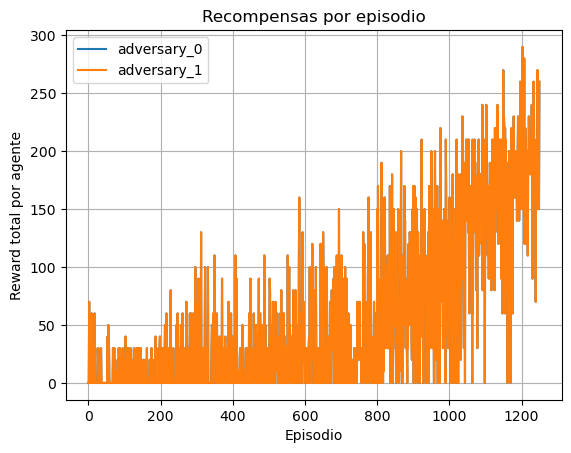

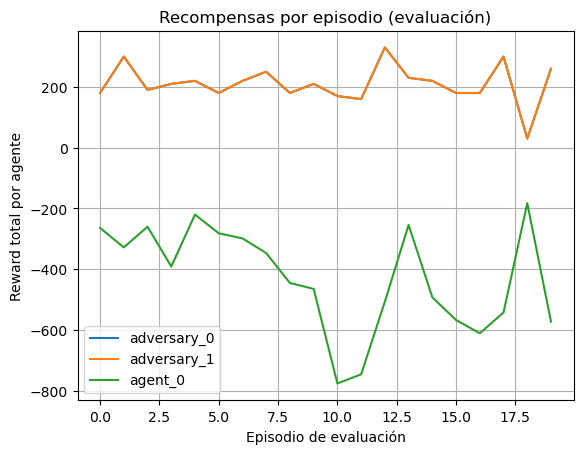

Video guardado en: demo_2.mp4


In [14]:
seed = 42
env = simple_tag_v3.parallel_env(render_mode='rgb_array', num_good=1, num_adversaries=2, num_obstacles=0, max_cycles=100, dynamic_rescaling = True)
env.reset(seed=seed)
agents = env.agents

base_params = dict(
    learning_rate = 0.001,
    buffer_size = 100000,
    learning_starts = 1000,
    batch_size = 128,
    tau = 1.0,
    gamma = 0.99,
    train_freq = 16,
    gradient_steps = 4,
    target_update_interval = 1000,
    exploration_fraction = 0.1,
    exploration_initial_eps = 1,
    exploration_final_eps = 0.1,
    max_grad_norm = 10,
    verbose = 0,
    beta = 0.3
)


agent_dict = {
    agent: NGU_DQN(FakeEnv(env.observation_space(agent), env.action_space(agent)), **base_params)
    for agent in agents if agent.startswith("adversary")
}

trainer = NGUMultiAgent(env, agent_dict, total_timesteps=125_000, log_interval=100)
trainer.learn()
trainer.plot_total_rewards()
trainer.evaluate(episodes=20)
trainer.render_and_save(num_tests=5, save_path="demo_2.mp4", fps=5, max_steps=50)

# 3 agentes

----------------------------------
| time/               |          |
|    episodes         | 100
|    fps              | 188
|    time_elapsed     | 53
|    total_timesteps  | 10000
|    ep_len_mean      | 100
| adversary_0 -> mean_ep_rew | 6.90 | loss: 0.1912 | eps: 0.955
| adversary_1 -> mean_ep_rew | 6.90 | loss: 0.1007 | eps: 0.955
| adversary_2 -> mean_ep_rew | 6.90 | loss: 0.2962 | eps: 0.955
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 200
|    fps              | 180
|    time_elapsed     | 110
|    total_timesteps  | 20000
|    ep_len_mean      | 100
| adversary_0 -> mean_ep_rew | 8.40 | loss: 0.3012 | eps: 0.910
| adversary_1 -> mean_ep_rew | 8.40 | loss: 0.2972 | eps: 0.910
| adversary_2 -> mean_ep_rew | 8.40 | loss: 0.1737 | eps: 0.910
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 300
|    fps              | 1

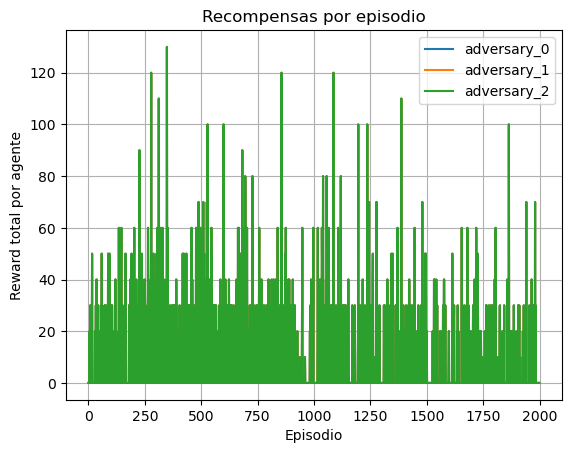

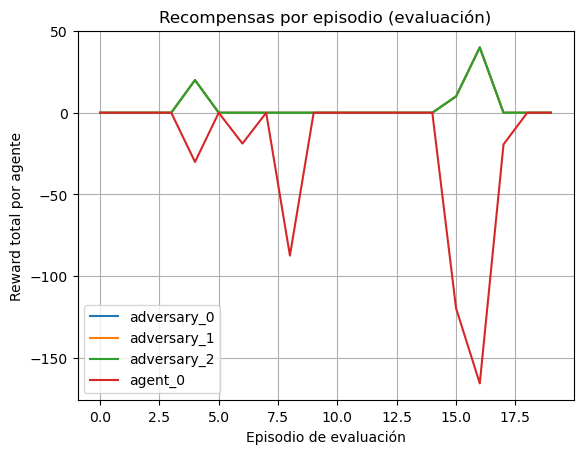

Video guardado en: demo_3.mp4


In [15]:
seed = 42
env = simple_tag_v3.parallel_env(render_mode='rgb_array', num_good=1, num_adversaries=3, num_obstacles=0, max_cycles=100, dynamic_rescaling = True)
env.reset(seed=seed)
agents = env.agents

base_params = dict(
    learning_rate = 0.001,
    buffer_size = 10000,
    learning_starts = 1000,
    batch_size = 128,
    tau = 1.0,
    gamma = 0.99,
    train_freq = 16,
    gradient_steps = 4,
    target_update_interval = 1000,
    exploration_fraction = 0.1,
    exploration_initial_eps = 1,
    exploration_final_eps = 0.1,
    max_grad_norm = 10,
    verbose = 0,
    beta = 0.3
)


agent_dict = {
    agent: NGU_DQN(FakeEnv(env.observation_space(agent), env.action_space(agent)), **base_params)
    for agent in agents if agent.startswith("adversary")
}

trainer = NGUMultiAgent(env, agent_dict, total_timesteps=200_000, log_interval=100)
trainer.learn()
trainer.plot_total_rewards()
trainer.evaluate(episodes=20)
trainer.render_and_save(num_tests=5, save_path="demo_3.mp4", fps=5, max_steps=50)

----------------------------------
| time/               |          |
|    episodes         | 100
|    fps              | 228
|    time_elapsed     | 65
|    total_timesteps  | 15000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 10.10 | loss: 0.0899 | eps: 0.933
| adversary_1 -> mean_ep_rew | 10.10 | loss: 0.0237 | eps: 0.933
| adversary_2 -> mean_ep_rew | 10.10 | loss: 0.0128 | eps: 0.933
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 200
|    fps              | 192
|    time_elapsed     | 155
|    total_timesteps  | 30000
|    ep_len_mean      | 150
| adversary_0 -> mean_ep_rew | 14.90 | loss: 0.0280 | eps: 0.865
| adversary_1 -> mean_ep_rew | 14.90 | loss: 0.1713 | eps: 0.865
| adversary_2 -> mean_ep_rew | 14.90 | loss: 0.1015 | eps: 0.865
----------------------------------
----------------------------------
| time/               |          |
|    episodes         | 300
|    fps           

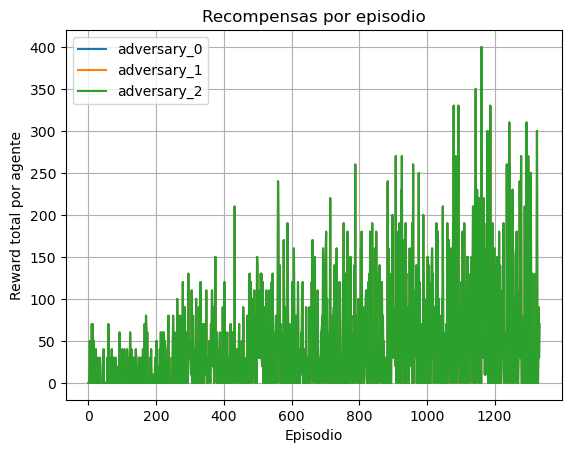

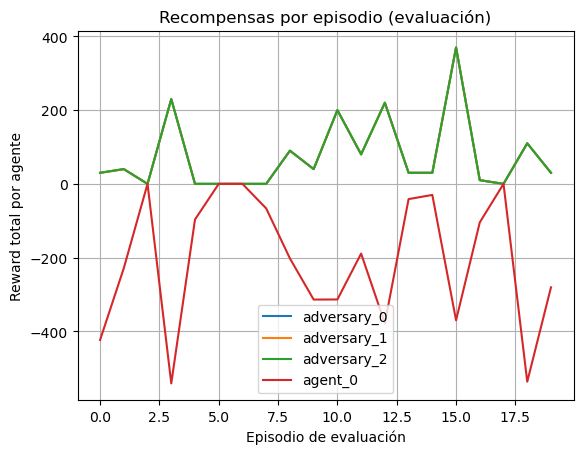

Video guardado en: demo_3.mp4


In [16]:
seed = 42
env = simple_tag_v3.parallel_env(render_mode='rgb_array', num_good=1, num_adversaries=3, num_obstacles=0, max_cycles=150, dynamic_rescaling = True)
env.reset(seed=seed)
agents = env.agents

base_params = dict(
    learning_rate = 0.001,
    buffer_size = 1000000,
    learning_starts =5000,
    batch_size = 128,
    tau = 1.0,
    gamma = 0.99,
    train_freq = 16,
    gradient_steps = 4,
    target_update_interval = 2000,
    exploration_fraction = 0.1,
    exploration_initial_eps = 1,
    exploration_final_eps = 0.1,
    max_grad_norm = 10,
    verbose = 0,
    beta = 0.3
)


agent_dict = {
    agent: NGU_DQN(FakeEnv(env.observation_space(agent), env.action_space(agent)), **base_params)
    for agent in agents if agent.startswith("adversary")
}

trainer = NGUMultiAgent(env, agent_dict, total_timesteps=200_000, log_interval=100)
trainer.learn()
trainer.plot_total_rewards()
trainer.evaluate(episodes=20)
trainer.render_and_save(num_tests=5, save_path="demo_3.mp4", fps=5, max_steps=50)